## Analysis of genes/CDS annotated as "hypothetical", "putative", or "unknown".

In [52]:
from Bio import SeqIO, Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature
import gffutils as gff
from BCBio import GFF
import copy
import pandas
from IPython.display import Markdown as md

## Load reference data (genome sequences and annotation)

#### Current working dir.

In [2]:
pwd

'/home/grotec/Repositories/sbw25_newgenome/annotate/geneious'

### Read the new assembly and transferred annotations

In [18]:
with open("gnl_MPB_PFLU_1-20210723.gb", 'r') as gb:
    new_genome = SeqIO.read(gb, "genbank")


In [54]:
idtbl = pandas.read_csv("up_mapped_ids.tsv", sep="\t")

In [76]:
idtbl["locustag"] = idtbl["Locus Tag"].str.replace("_","")

In [77]:
idtbl['locustag']

0       PFLU0001
1       PFLU0002
2       PFLU0003
3       PFLU0004
4       PFLU0005
          ...   
5909    PFLU6132
5910    PFLU6133
5911    PFLU6134
5912    PFLU6135
5913    PFLU6136
Name: locustag, Length: 5914, dtype: object

In [100]:
idtbl[idtbl.GeneNames=="wssG"]

Uniprot   UniprotGene      Status                    Protein_names  \
289  C3K6B5  C3K6B5_PSEFS  unreviewed  Cell morphology-related protein   

    GeneNames                                Organism  Length ProteinID  CCDS  \
289      wssG  Pseudomonas fluorescens (strain SBW25)     221  CAY46583   NaN   

         EMBL  ...  HAMAP InterPro PANTHER Pfam  PRINTS  SMART SUPFAM  \
289  AM181176  ...    NaN      NaN     NaN  NaN     NaN    NaN    NaN   

     TIGRFAMs  Locus Tag  locustag  
289       NaN  PFLU_0306  PFLU0306  

[1 rows x 46 columns]

In [101]:
idtbl[idtbl['locustag']=="PFLU0005"]

Uniprot   UniprotGene      Status  \
4  C3KDU6  C3KDU6_PSEFS  unreviewed   

                                       Protein_names GeneNames  \
4  Putative two-component system, response regulator       NaN   

                                 Organism  Length ProteinID  CCDS      EMBL  \
4  Pseudomonas fluorescens (strain SBW25)     240  CAY46290   NaN  AM181176   

   ...  HAMAP                                           InterPro    PANTHER  \
4  ...    NaN  IPR011006;IPR001867;IPR001789;IPR039420;IPR036388  PTHR48111   

              Pfam  PRINTS            SMART    SUPFAM  TIGRFAMs  Locus Tag  \
4  PF00072;PF00486     NaN  SM00448;SM00862  SSF52172       NaN  PFLU_0005   

   locustag  
4  PFLU0005  

[1 rows x 46 columns]

In [127]:
idtbl = idtbl.set_index('locustag')

In [132]:
any(idtbl.index.duplicated())

False

In [35]:
putative_and_hypotheticals = []

In [36]:
for i,feat in enumerate(new_genome.features):
    products = feat.qualifiers.get('product')
    if products is None:
        continue
    if any(["hypothetical" in product or "putative" in product or "unknown" in product for product in products]):
#         print(i, feat.id, description)
        putative_and_hypotheticals.append(feat.qualifiers.get('gene')[-1])

In [37]:
md(f"Found {len(putative_and_hypotheticals)} putative/hypothetical proteins.")

Found 4610 putative/hypothetical proteins.

In [38]:
putative_and_hypotheticals[:10]

['PFLU0005',
 'PFLU0006',
 'PFLU0007',
 'PFLU0008',
 'PFLU0012',
 'PFLU0014',
 'PFLU0019',
 'PFLU0021',
 'PFLU0025',
 'PFLU0026']

In [50]:
## Export to file
with open("putatives_20210723.txt", "w") as fp:
    for put in putative_and_hypotheticals:
        fp.write(put+"\n")
        

## Task 1: find if information on swissprot is updated.

In [111]:
locustag_to_upid = copy.deepcopy(idtbl[["Uniprot", 'Status', 'locustag']]).set_index('locustag')

In [108]:
locustag_to_upid

Uniprot      Status
locustag                    
PFLU0001  B0B0A5    reviewed
PFLU0002  C3KDU3  unreviewed
PFLU0003  C3KDU4    reviewed
PFLU0004  C3KDU5  unreviewed
PFLU0005  C3KDU6  unreviewed
...          ...         ...
PFLU6132  C3K1G0  unreviewed
PFLU6133  C3K1G1  unreviewed
PFLU6134  C3K1G2    reviewed
PFLU6135  C3K1G3  unreviewed
PFLU6136  C3K1G4    reviewed

[5914 rows x 2 columns]

In [114]:
transferred_annotation_table = pandas.read_csv('transferred_annotations_geneious_20210723.csv')

In [118]:
transferred_annotation_table.head(30)

Sequence Name                               Name             Type  \
0   gnl|MPB|PFLU_1                    ReD1 difference  misc_difference   
1   gnl|MPB|PFLU_1                       PFLU0001 CDS              CDS   
2   gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
3   gnl|MPB|PFLU_1                               misc     misc_feature   
4   gnl|MPB|PFLU_1    PS01008 DnaA protein signature.     misc_feature   
5   gnl|MPB|PFLU_1                       PFLU0002 CDS              CDS   
6   gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
7   gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
8   gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
9   gnl|MPB|PFLU_1                       PFLU0003 CDS              CDS   
10  gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
11  gnl|MPB|PFLU_1                               misc     misc_feature   
12  gnl|MPB|PFLU_1  PS00617 RecF protein signature 1.     misc_feature   
13  gnl|MPB|PFLU_1  PS00618 RecF protein signature 2.     misc_feature   
14  gnl|MPB|PFLU_1                       PFLU0004 CDS              CDS   
15  gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
16  gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
17  gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
18  gnl|MPB|PFLU_1                               misc     misc_feature   
19  gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
20  gnl|MPB|PFLU_1                       PFLU0005 CDS              CDS   
21  gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
22  gnl|MPB|PFLU_1                               misc     misc_feature   
23  gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
24  gnl|MPB|PFLU_1                       PFLU0006 CDS              CDS   
25  gnl|MPB|PFLU_1                               misc     misc_feature   
26  gnl|MPB|PFLU_1                       PFLU0007 CDS              CDS   
27  gnl|MPB|PFLU_1                               misc     misc_feature   
28  gnl|MPB|PFLU_1                            HMMPfam     misc_feature   
29  gnl|MPB|PFLU_1                               misc     misc_feature   

   Minimum Maximum Length  # Intervals Direction  \
0        1   16700  16700            1   forward   
1        1    1506   1506            1   forward   
2      496    1434    939            1   forward   
3      616     639     24            1   forward   
4     1375    1434     60            1   forward   
5     1545    2648   1104            1   forward   
6     1545    1904    360            1   forward   
7     1929    2276    348            1   forward   
8     2280    2642    363            1   forward   
9     2669    3772   1104            1   forward   
10    2669    3649    981            1   forward   
11    2756    2779     24            1   forward   
12    3005    3082     78            1   forward   
13    3569    3622     54            1   forward   
14    3777    6194   2418            1   forward   
15    3873    4304    432            1   forward   
16    4440    4952    513            1   forward   
17    5031    5369    339            1   forward   
18    5043    5069     27            1   forward   
19    5964    6158    195            1   forward   
20    6299    7021    723            1   reverse   
21    6329    6559    231            1   reverse   
22    6473    6517     45            1   reverse   
23    6641    7021    381            1   reverse   
24    7284    8240    957            1   forward   
25    7284    7397    114            1   forward   
26    8244   10523   2280            1   forward   
27    8319    9368    258            4   forward   
28    8370    9167    798            1   forward   
29    8991    9020     30            1   forward   

                                                 note  \
0                                       

In [119]:
# take out all CDS
transferred_cds_annotations = transferred_annotation_table[transferred_annotation_table["Type.1"]=="CDS"]

In [120]:
transferred_cds_annotations

Sequence Name          Name Type  Minimum  Maximum Length  \
1      gnl|MPB|PFLU_1  PFLU0001 CDS  CDS        1     1506   1506   
5      gnl|MPB|PFLU_1  PFLU0002 CDS  CDS     1545     2648   1104   
9      gnl|MPB|PFLU_1  PFLU0003 CDS  CDS     2669     3772   1104   
14     gnl|MPB|PFLU_1  PFLU0004 CDS  CDS     3777     6194   2418   
20     gnl|MPB|PFLU_1  PFLU0005 CDS  CDS     6299     7021    723   
...               ...           ...  ...      ...      ...    ...   
21507  gnl|MPB|PFLU_1  PFLU6132 CDS  CDS  6715365  6717803   2439   
21513  gnl|MPB|PFLU_1  PFLU6133 CDS  CDS  6717887  6719257   1371   
21516  gnl|MPB|PFLU_1  PFLU6134 CDS  CDS  6719337  6721019   1683   
21519  gnl|MPB|PFLU_1  PFLU6135 CDS  CDS  6721260  6721664    405   
21521  gnl|MPB|PFLU_1  PFLU6136 CDS  CDS  6721681  6721815    135   

       # Intervals Direction note  \
1                1   forward  NaN   
5                1   forward  NaN   
9                1   forward  NaN   
14               1   forward  NaN   
20               1   reverse  NaN   
...            ...       ...  ...   
21507            1   forward  NaN   
21513            1   reverse  NaN   
21516            1   reverse  NaN   
21519            1   reverse  NaN   
21521            1   reverse  NaN   

                                              similarity            gene  \
1      fasta; with=UniProt:DNAA_ECOLI (EMBL:ECDNAAN);...  dnaA; PFLU0001   
5      fasta; with=UniProt:DP3B_ECOLI (EMBL:A91510);E...  dnaN; PFLU0002   
9      fasta; with=UniProt:RECF_ECOLI (EMBL:C91208);E...  recF; PFLU0003   
14     fasta; with=UniProt:GYRB_ECOLI (EMBL:CEK132C8R...  gyrB; PFLU0004   
20     fasta; with=UniProt:Q9HWZ5 (EMBL:AE004820); Ps...        PFLU0005   
...                                                  ...             ...   
21507  fasta; with=UniProt:Q7WFZ8; Bordetella bronchi...        PFLU6132   
21513  fasta; with=UniProt:P25522 (EMBL:ECUW82); Esch...  trmE; PFLU6133   
21516  fasta; with=UniProt:P25714 (EMBL:ECUW82); Esch...        PFLU6134   
21519  fasta; with=UniProt:P0A7Y8 (EMBL:ECUW82); Esch...  rnpA; PFLU6135   
21521  fasta; with=UniProt:P02437 (EMBL:ECDNAAN); Esc...  rpmH; PFLU6136   

                                                 product db_xref domain   id  \
1         chromosomal replication initiator protein DnaA     NaN    NaN  NaN   
5                         DNA polymerase III, beta chain     NaN    NaN  NaN   
9                DNA replication and repair protein RecF     NaN    NaN  NaN   
14                                  DNA gyrase subunit B     NaN    NaN  NaN   
20     putative two-component system, response regulator     NaN    NaN  NaN   
...                                                  ...     ...    ...  ...   
21507               putative ferric siderophore receptor     NaN    NaN  NaN   
21513                  probable tRNA modification GTPase     NaN    NaN  NaN   
21516                    putative inner membrane protein     NaN    NaN  NaN   
21519                   ribonuclease P protein component     NaN    NaN  NaN   
21521                          50S ribosomal protein L34     NaN    NaN  NaN   

      ortholog  pseudo Type.1  
1          NaN     NaN    CDS  
5          NaN     NaN    CDS  
9          NaN     NaN    CDS  
14         NaN     NaN    CDS  
20         NaN     NaN    CDS  
...        ...     ...    ...  
21507      NaN     NaN    CDS  
21513      NaN     NaN    CDS  
21516      NaN     NaN    CDS  
21519      NaN     NaN    CDS  
21521      NaN     NaN    CDS  

[6007 rows x 18 columns]

In [142]:
transferred_cds_annotations["locustag"] = transferred_cds_annotations["Name"].str.replace(" CDS","")

In [143]:
transferred_cds_annotations = transferred_cds_annotations.set_index("locustag")

In [144]:
transferred_cds_annotations[transferred_cds_annotations.index.duplicated()]

Sequence Name          Name Type  Minimum  Maximum Length  \
locustag                                                               
PFLU3051  gnl|MPB|PFLU_1  PFLU3051 CDS  CDS  3329815  3330012    198   

          # Intervals Direction                             note  \
locustag                                                           
PFLU3051            1   forward  No significant database matches   

                                                 similarity      gene  \
locustag                                                                
PFLU3051  fasta; with=UniProt:Q881N4 (EMBL:AE016853); Ps...  PFLU3051   

                                              product db_xref domain   id  \
locustag                                                                    
PFLU3051  conserved hypothetical protein (pseudogene)     NaN    NaN  NaN   

         ortholog  pseudo Type.1  
locustag                          
PFLU3051      NaN     NaN    CDS

In [146]:
transferred_cds_annotations.drop("PFLU3051", inplace=True)

In [148]:
transferred_vs_uniprot = pandas.concat([transferred_cds_annotations, idtbl], join='outer', axis='columns')

In [171]:
reviewed = transferred_vs_uniprot.loc[transferred_vs_uniprot["Status"]=="reviewed", ["gene", "product","Uniprot", "Status", "Protein_names", "GeneNames" ]]

In [174]:
reviewed['gene'] = reviewed['gene'].str.capitalize()

In [175]:
reviewed

gene                                            product  \
locustag                                                                      
PFLU0001  Dnaa; pflu0001     chromosomal replication initiator protein DnaA   
PFLU0003  Recf; pflu0003            DNA replication and repair protein RecF   
PFLU0010  Glys; pflu0010  glycyl-tRNA synthetase beta chain (ec 6.1.1.14...   
PFLU0011  Glyq; pflu0011                 glycyl-tRNA synthetase alpha chain   
PFLU0017   Fmt; pflu0017                   methionyl-tRNA formyltransferase   
...                  ...                                                ...   
PFLU6121  Atph; pflu6121                           ATP synthase delta chain   
PFLU6123  Atpe; pflu6123                               ATP synthase C chain   
PFLU6124  Atpb; pflu6124                               ATP synthase A chain   
PFLU6134        Pflu6134                    putative inner membrane protein   
PFLU6136  Rpmh; pflu6136                          50S ribosomal protein L34   

         Uniprot    Status                                      Protein_names  \
locustag                                                                        
PFLU0001  B0B0A5  reviewed     Chromosomal replication initiator protein DnaA   
PFLU0003  C3KDU4  reviewed            DNA replication and repair protein RecF   
PFLU0010  C3KE40  reviewed  Glycine--tRNA ligase beta subunit (EC 6.1.1.14...   
PFLU0011  C3KE41  reviewed  Glycine--tRNA ligase alpha subunit (EC 6.1.1.1...   
PFLU0017  C3KE47  reviewed      Methionyl-tRNA formyltransferase (EC 2.1.2.9)   
...          ...       ...                                                ...   
PFLU6121  C3K1E9  reviewed  ATP synthase subunit delta (ATP synthase F(1) ...   
PFLU6123  C3K1F1  reviewed  ATP synthase subunit c (ATP synthase F(0) sect...   
PFLU6124  C3K1F2  reviewed  ATP synthase subunit a (ATP synthase F0 sector...   
PFLU6134  C3K1G2  reviewed  Membrane protein insertase YidC (Foldase YidC)...   
PFLU6136  C3K1G4  reviewed                          50S ribosomal protein L34   

         GeneNames  
locustag            
PFLU0001      dnaA  
PFLU0003      recF  
PFLU0010      glyS  
PFLU0011      glyQ  
PFLU0017       fmt  
...            ...  
PFLU6121      atpH  
PFLU6123      atpE  
PFLU6124      atpB  
PFLU6134      yidC  
PFLU6136      rpmH  

[410 rows x 6 columns]

In [177]:
differ_in_product=  reviewed.loc[reviewed["product"].str.lower() != reviewed["Protein_names"].str.lower()]

In [178]:
differ_in_product

gene                                            product  \
locustag                                                                      
PFLU0010  Glys; pflu0010  glycyl-tRNA synthetase beta chain (ec 6.1.1.14...   
PFLU0011  Glyq; pflu0011                 glycyl-tRNA synthetase alpha chain   
PFLU0017   Fmt; pflu0017                   methionyl-tRNA formyltransferase   
PFLU0023  Hemf; pflu0023            coproporphyrinogen III oxidase, aerobic   
PFLU0035  Trpa; pflu0035                    tryptophan synthase alpha chain   
...                  ...                                                ...   
PFLU6120  Atpa; pflu6120                           ATP synthase alpha chain   
PFLU6121  Atph; pflu6121                           ATP synthase delta chain   
PFLU6123  Atpe; pflu6123                               ATP synthase C chain   
PFLU6124  Atpb; pflu6124                               ATP synthase A chain   
PFLU6134        Pflu6134                    putative inner membrane protein   

         Uniprot    Status                                      Protein_names  \
locustag                                                                        
PFLU0010  C3KE40  reviewed  Glycine--tRNA ligase beta subunit (EC 6.1.1.14...   
PFLU0011  C3KE41  reviewed  Glycine--tRNA ligase alpha subunit (EC 6.1.1.1...   
PFLU0017  C3KE47  reviewed      Methionyl-tRNA formyltransferase (EC 2.1.2.9)   
PFLU0023  C3K4I0  reviewed  Oxygen-dependent coproporphyrinogen-III oxidas...   
PFLU0035  C3K568  reviewed      Tryptophan synthase alpha chain (EC 4.2.1.20)   
...          ...       ...                                                ...   
PFLU6120  C3K1E8  reviewed  ATP synthase subunit alpha (EC 7.1.2.2) (ATP s...   
PFLU6121  C3K1E9  reviewed  ATP synthase subunit delta (ATP synthase F(1) ...   
PFLU6123  C3K1F1  reviewed  ATP synthase subunit c (ATP synthase F(0) sect...   
PFLU6124  C3K1F2  reviewed  ATP synthase subunit a (ATP synthase F0 sector...   
PFLU6134  C3K1G2  reviewed  Membrane protein insertase YidC (Foldase YidC)...   

         GeneNames  
locustag            
PFLU0010      glyS  
PFLU0011      glyQ  
PFLU0017       fmt  
PFLU0023      hemF  
PFLU0035      trpA  
...            ...  
PFLU6120      atpA  
PFLU6121      atpH  
PFLU6123      atpE  
PFLU6124      atpB  
PFLU6134      yidC  

[358 rows x 6 columns]

In 358 features, the latest reference annotation differs from the Sanger manually curated annotation.

In [180]:
differ_in_product.loc[differ_in_product['product'].str.match("putative|hypothetical|unknown")]

gene                                            product Uniprot  \
locustag                                                                        
PFLU0384  Pflu0384  putative Sec-independent protein translocase p...  C3K8T9   
PFLU0385  Pflu0385        putative phosphoribosyl-ATP pyrophosphatase  C3K8U0   
PFLU0387  Pflu0387   putative ubiquinone biosynthesis-related protein  C3K8U2   
PFLU0511  Pflu0511                                   putative GTP-ase  C3KDV4   
PFLU0524  Pflu0524  putative ATP phosphoribosyltransferase regulat...  C3KDW7   
...            ...                                                ...     ...   
PFLU5741  Pflu5741  putative malonate decarboxylase acyl carrier p...  C3K3I7   
PFLU5756  Pflu5756               putative holliday junction resolvase  C3K3K0   
PFLU5766  Pflu5766            putative homoserine O-acetyltransferase  C3K3L0   
PFLU6096  Pflu6096       putative cardiolipin synthase family protein  C3K1C4   
PFLU6134  Pflu6134                    putative inner membrane protein  C3K1G2   

            Status                                      Protein_names  \
locustag                                                                
PFLU0384  reviewed   Sec-independent protein translocase protein TatA   
PFLU0385  reviewed  Phosphoribosyl-ATP pyrophosphatase (PRA-PH) (E...   
PFLU0387  reviewed  Probable protein kinase UbiB (EC 2.7.-.-) (Ubi...   
PFLU0511  reviewed  Small ribosomal subunit biogenesis GTPase RsgA...   
PFLU0524  reviewed   ATP phosphoribosyltransferase regulatory subunit   
...            ...                                                ...   
PFLU5741  reviewed  Malonate decarboxylase acyl carrier protein (M...   
PFLU5756  reviewed        Putative pre-16S rRNA nuclease (EC 3.1.-.-)   
PFLU5766  reviewed  Homoserine O-succinyltransferase (HST) (EC 2.3...   
PFLU6096  reviewed  Cardiolipin synthase A (CL synthase) (EC 2.7.8.-)   
PFLU6134  reviewed  Membrane protein insertase YidC (Foldase YidC)...   

         GeneNames  
locustag            
PFLU0384      tatA  
PFLU0385      hisE  
PFLU0387      ubiB  
PFLU0511      rsgA  
PFLU0524      hisZ  
...            ...  
PFLU5741      mdcC  
PFLU5756       NaN  
PFLU5766     metXS  
PFLU6096  clsA;cls  
PFLU6134      yidC  

[62 rows x 6 columns]

## Conclusion:
In 62 CDS, the product description containing the word "putative" or "hypothetical" or "unknown" in the 2009 annotation changed to a different annotation in the latest (2021) Swissprot release.

In [181]:
# locus tags that have vanished in swissprot

In [187]:
transferred_cds_annotations.index.symmetric_difference(idtbl.index)

Index(['PFLU0195', 'PFLU0217', 'PFLU0221', 'PFLU0222', 'PFLU0224', 'PFLU0225',
       'PFLU0297', 'PFLU0350', 'PFLU0407', 'PFLU0410',
       ...
       'atpF', 'elbB', 'flhB',
       'lexA; Synonyms=exrA, spr, tsl, umuA; OrderedLocusNames=b4043;', 'sdhC',
       'sucA', 'typA', 'viscA', 'viscB', 'viscC'],
      dtype='object', name='locustag', length=117)

## Vanished locus tags or gene names
104 locus tags or gene names found in the 2009 genome are no longer present in the uniprot database (no matter if reviewed or not).

## Tasks
1. Import both transfers of latest reference annotation and Sanger 2009 annotation in apollo/jbrowse
1. Explore differences in both annotations visually
1. Manually update the Sanger annotations in case new data is in the latest reference genome

## Read in the genome sequence

In [40]:
pflu0005 = new_genome.features[5]

In [46]:
print(pflu0005.extract(new_records[0]).seq)

ATGCATTTCACCATTCAACGCGAAGCCCTGTTGAAACCCCTGCAACTGGTCGCAGGCGTCGTCGAGCGCCGACAGACCTTGCCGGTGCTCTCCAACGTATTGCTGGTGGTCGAAGGCCAGCAATTGTCCCTGACCGGTACCGACCTGGAAGTCGAGCTGGTTGGTCGTGTGCAGCTGGAAGAGCCCGCCGAACCTGGCGAGATCACCGTGCCGGCGCGCAAGCTGATGGACATCTGCAAAAGCCTGCCGAACGACGCGCTGATCGACATCAAGGTTGATGAAGCGAAGTTGGTCGTCAAAGCCGGTCGCAGCCGCTTCACCCTGTCCACCTTGCCGGCCAATGATTTCCCGACGGTGGAAGAAGGTCCTGGTTCGCTGACCTGCAGCCTGGAGCAAAGCAAACTGCGTCGTTTGATTGAGCGCACCAGTTTCGCCATGGCCCAGCAGGACGTGCGTTACTACCTCAACGGCATGCTCTTGGAAGTGTCGGAAGGCATTATCCGCGCCGTGGCTACCGACGGTCACCGTCTGGCGATGTGCTCGATGCGTGCTGATATCGGCCAGCCGGACCGTCACCAGGTGATCGTGCCACGCAAGGGTATCCTTGAGCTGGCGCGTCTGCTCACTGAGCCGGAAGGCAATGTCAGCATCGTGTTGGGCCAGCACCACATTCGCGCTACCACTGGCGAGTTCACCTTCACTTCCAAACTGGTCGACGGCAAGTTCCCGGATTACGAGCGCGTGCTGCCTAAAGGCGGTGACAAGCTGGTACTCGGTGATCGCCAGGCCTTGCGCGAGGCGTTCAGCCGTACCGCGATTCTGTCCAACGAAAAGTACCGTGGTATCCGTCTGCAACTGGCCAACGGTCAGTTGAAGATTCAGGCGAACAACCCGGAGCAGGAAGAAGCGGAAGAAGAAGTGGGCGTCGACTACAACGGCGGTTCACTCGAGATTGGCTTCAACGTGAGCTACCTGCTGGACGTACTGGGTGTGATGACCA

In [39]:
new_genome_fa= "/home/grotec/mnt/wallace/home/grotec/data/sync/sbw25/ensembl_49/Pseudomonas_fluorescens_sbw25_gca_000009225.ASM922v1.dna.chromosome.Chromosome.fa"
ref_records = next(SeqIO.parse(open(ref_fasta, 'r'),'fasta'))

In [47]:
with open("putatives.txt", "w") as fp:
    for feat in putative_and_hypotheticals:
        mRNAs = db.children(feat, featuretype="mRNA")

        for mRNA in mRNAs:
            fp.write(mRNA.id.split(":")[1]+"\n")

## Processing steps
* get uniprot protein sequences
* export as fasta
* makeblastdb
* blastp

In [48]:
!wget https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.fasta.gz

--2021-05-05 15:49:46--  https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.fasta.gz
Resolving ftp.uniprot.org (ftp.uniprot.org)... 128.175.240.195
Connecting to ftp.uniprot.org (ftp.uniprot.org)|128.175.240.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89966396 (86M) [application/x-gzip]
Saving to: ‘uniprot_sprot.fasta.gz’

uniprot_sprot.fasta 100%[===================>]  85.80M  1.08MB/s    in 91s     

2021-05-05 15:51:18 (963 KB/s) - ‘uniprot_sprot.fasta.gz’ saved [89966396/89966396]



In [124]:
import pandas

blastp output was written to file "putatives_blastp_out.tsv".

## Read in the blast results table.

In [137]:
blastp_data = pandas.read_csv("putatives_blastp_out.tsv", sep="\t", header=None)

In [138]:
blastp_data.head()

0                     1                     2   \
0  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS   
1  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|Q3K8D5|TTCA_PSEPF   
2  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|Q4ZQ35|TTCA_PSEU2   
3  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|Q48FG8|TTCA_PSE14   
4  sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS  sp|Q885Z7|TTCA_PSESM   

                     3    4   5    6    7   8    9    10    11   12       13  \
0  sp|C3JY43|TTCA_PSEFS  274   1  274  274   1  274  0.0  1470  274  100.000   
1  sp|Q3K8D5|TTCA_PSEPF  274   1  274  274   1  274  0.0  1442  274   97.080   
2  sp|Q4ZQ35|TTCA_PSEU2  274   1  274  274   1  274  0.0  1405  274   93.796   
3  sp|Q48FG8|TTCA_PSE14  274   1  274  274   1  274  0.0  1405  274   93.431   
4  sp|Q885Z7|TTCA_PSESM  274   1  274  274   1  274  0.0  1388  274   92.336   

    14  15  16  17                                                 18  
0  274   0   0   0  sp|C3JY43|TTCA_PSEFS tRNA-cytidine(32) 2-sulfu...  
1  266   8   0   0  sp|Q3K8D5|TTCA_PSEPF tRNA-cytidine(32) 2-sulfu...  
2  257  17   0   0  sp|Q4ZQ35|TTCA_PSEU2 tRNA-cytidine(32) 2-sulfu...  
3  256  18   0   0  sp|Q48FG8|TTCA_PSE14 tRNA-cytidine(32) 2-sulfu...  
4  253  21   0   0  sp|Q885Z7|TTCA_PSESM tRNA-cytidine(32) 2-sulfu...

In [287]:
# Have to set the column headers.
columns=["qseqid","qacc","sallseqid","sallacc","slen","sstart","send","qlen","qstart","qend","evalue","score","length","pident","nident","mismatch","gapopen","gaps","salltitles"]

In [140]:
blastp_data.shape

(607091, 19)

In [142]:
blastp_data.columns = columns

### Drop uninteresting columns

In [311]:
blastp_data.drop(columns=["qseqid", "sallacc", "evalue", "slen", "score", "length", "nident", "mismatch", "gapopen", "gaps"], inplace=True)

## Determine number of hits in bins of `pident` level.

In [312]:
blastp_data["pident_level"] = pandas.cut(blastp_data['pident'],bins=[0,60,90,97,100], labels=["poor (0-60)", "fair (60-90)", "good (90-97)", "excellent (97-100)"])

<AxesSubplot:title={'center':'Number of blastp hits in `pident` categories.'}, ylabel='pident_level'>

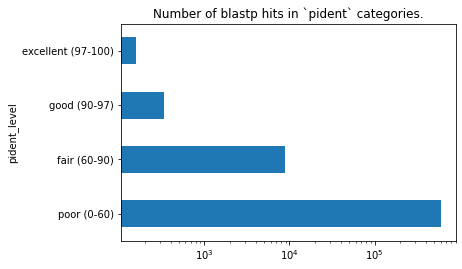

In [313]:
blastp_data.groupby("pident_level").count()['pident'].plot(kind='barh', logx=True, title="Number of blastp hits in `pident` categories.")

## Analyse only hits with pident == 100 

In [314]:
top = blastp_data[blastp_data.pident==100]

In [315]:
top

qacc             sallseqid  sstart  send  qlen  \
0         sp|C3JY43|TTCA_PSEFS  sp|C3JY43|TTCA_PSEFS       1   274   274   
500       sp|C3K839|Y879_PSEFS  sp|C3K839|Y879_PSEFS       1   285   285   
1000      sp|C3KE92|YACG_PSEFS  sp|C3KE92|YACG_PSEFS       1    66    66   
1175      sp|C3KE01|Y992_PSEFS  sp|C3KE01|Y992_PSEFS       1   259   259   
1495      sp|C3JZS5|TRPF_PSEFS  sp|C3JZS5|TRPF_PSEFS       1   210   210   
...                        ...                   ...     ...   ...   ...   
106454  tr|C3JY61|C3JY61_PSEFS   sp|P65116|IF1_PSEAE       1    72    72   
106455  tr|C3JY61|C3JY61_PSEFS   sp|Q02NB1|IF1_PSEAB       1    72    72   
106456  tr|C3JY61|C3JY61_PSEFS   sp|A6V4G7|IF1_PSEA7       1    72    72   
106457  tr|C3JY61|C3JY61_PSEFS   sp|Q48H67|IF1_PSE14       1    72    72   
130922  tr|C3K8K1|C3K8K1_PSEFS  sp|P86348|ALPH_DEIAC       1    20   394   

        qstart  qend  pident  \
0            1   274   100.0   
500          1   285   100.0   
1000         1    66   100.0   
1175         1   259   100.0   
1495         1   210   100.0   
...        ...   ...     ...   
106454       1    72   100.0   
106455       1    72   100.0   
106456       1    72   100.0   
106457       1    72   100.0   
130922      25    44   100.0   

                                               salltitles        pident_level  
0       sp|C3JY43|TTCA_PSEFS tRNA-cytidine(32) 2-sulfu...  excellent (97-100)  
500     sp|C3K839|Y879_PSEFS Nucleotide-binding protei...  excellent (97-100)  
1000    sp|C3KE92|YACG_PSEFS DNA gyrase inhibitor YacG...  excellent (97-100)  
1175    sp|C3KE01|Y992_PSEFS UPF0246 protein PFLU_0992...  excellent (97-100)  
1495    sp|C3JZS5|TRPF_PSEFS N-(5'-phosphoribosyl)anth...  excellent (97-100)  
...                                                   ...                 ...  
106454  sp|P65116|IF1_PSEAE Translation initiation fac...  excellent (97-100)  
106455  sp|Q02NB1|IF1_PSEAB Translation initiation fac...  excellent (97-100)  
106456  sp|A6V4G7|IF1_PSEA7 Translation initiation fac...  excellent (97-100)  
106457  sp|Q48H67|IF1_PSE14 Translation initiation fac...  excellent (97-100)  
130922  sp|P86348|ALPH_DEIAC Alkaline phosphatase (Fra...  excellent (97-100)  

[129 rows x 10 columns]

## Filter entries where query seq id != subject seq id
Here we look at hits where the query gene protein ID is **different** from the subject protein ID.

In [318]:
top = top[top.qacc != top.sallseqid]

In [319]:
top

qacc             sallseqid  sstart  send  qlen  \
5628      sp|C3K0N7|RL32_PSEFS  sp|Q3K8K7|RL32_PSEPF       1    60    60   
5630      sp|C3K0N7|RL32_PSEFS  sp|Q4KFS0|RL32_PSEF5       1    60    60   
7626      sp|C3JZN5|RL35_PSEFS  sp|Q4ZUG5|RL35_PSEU2       1    64    64   
7627      sp|C3JZN5|RL35_PSEFS  sp|P0A164|RL35_PSESY       1    64    64   
7628      sp|C3JZN5|RL35_PSEFS  sp|P0A163|RL35_PSESM       1    64    64   
7629      sp|C3JZN5|RL35_PSEFS  sp|Q3KEY0|RL35_PSEPF       1    64    64   
7631      sp|C3JZN5|RL35_PSEFS  sp|Q4KEW2|RL35_PSEF5       1    64    64   
7632      sp|C3JZN5|RL35_PSEFS  sp|Q48JS1|RL35_PSE14       1    64    64   
13061     sp|C3K6U0|Y090_PSEFS  sp|Q4KKI8|Y093_PSEF5       1    54    54   
106445  tr|C3JY61|C3JY61_PSEFS   sp|A4VLV5|IF1_PSEU5       1    72    72   
106446  tr|C3JY61|C3JY61_PSEFS   sp|Q4ZRK8|IF1_PSEU2       1    72    72   
106447  tr|C3JY61|C3JY61_PSEFS   sp|P65117|IF1_PSEPK       1    72    72   
106448  tr|C3JY61|C3JY61_PSEFS   sp|B0KLX5|IF1_PSEPG       1    72    72   
106449  tr|C3JY61|C3JY61_PSEFS   sp|Q3KA77|IF1_PSEPF       1    72    72   
106450  tr|C3JY61|C3JY61_PSEFS   sp|A5W1G9|IF1_PSEP1       1    72    72   
106451  tr|C3JY61|C3JY61_PSEFS   sp|A4XUY2|IF1_PSEMY       1    72    72   
106452  tr|C3JY61|C3JY61_PSEFS   sp|Q4K9U9|IF1_PSEF5       1    72    72   
106453  tr|C3JY61|C3JY61_PSEFS   sp|Q1IBD7|IF1_PSEE4       1    72    72   
106454  tr|C3JY61|C3JY61_PSEFS   sp|P65116|IF1_PSEAE       1    72    72   
106455  tr|C3JY61|C3JY61_PSEFS   sp|Q02NB1|IF1_PSEAB       1    72    72   
106456  tr|C3JY61|C3JY61_PSEFS   sp|A6V4G7|IF1_PSEA7       1    72    72   
106457  tr|C3JY61|C3JY61_PSEFS   sp|Q48H67|IF1_PSE14       1    72    72   
130922  tr|C3K8K1|C3K8K1_PSEFS  sp|P86348|ALPH_DEIAC       1    20   394   

        qstart  qend  pident  \
5628         1    60   100.0   
5630         1    60   100.0   
7626         1    64   100.0   
7627         1    64   100.0   
7628         1    64   100.0   
7629         1    64   100.0   
7631         1    64   100.0   
7632         1    64   100.0   
13061        1    54   100.0   
106445       1    72   100.0   
106446       1    72   100.0   
106447       1    72   100.0   
106448       1    72   100.0   
106449       1    72   100.0   
106450       1    72   100.0   
106451       1    72   100.0   
106452       1    72   100.0   
106453       1    72   100.0   
106454       1    72   100.0   
106455       1    72   100.0   
106456       1    72   100.0   
106457       1    72   100.0   
130922      25    44   100.0   

                                               salltitles        pident_level  
5628    sp|Q3K8K7|RL32_PSEPF 50S ribosomal protein L32...  excellent (97-100)  
5630    sp|Q4KFS0|RL32_PSEF5 50S ribosomal protein L32...  excellent (97-100)  
7626    sp|Q4ZUG5|RL35_PSEU2 50S ribosomal protein L35...  excellent (97-100)  
7627    sp|P0A164|RL35_PSESY 50S ribosomal protein L35...  excellent (97-100)  
7628    sp|P0A163|RL35_PSESM 50S ribosomal protein L35...  excellent (97-100)  
7629    sp|Q3KEY0|RL35_PSEPF 50S ribosomal protein L35...  excellent (97-100)  
7631    sp|Q4KEW2|RL35_PSEF5 50S ribosomal protein L35...  excellent (97-100)  
7632    sp|Q48JS1|RL35_PSE14 50S ribosomal protein L35...  excellent (97-100)  
13061   sp|Q4KKI8|Y093_PSEF5 UPF0391 membrane protein ...  excellent (97-100)  
106445  sp|A4VLV5|IF1_PSEU5 Translation initiation fac...  excellent (97-100)  
106446  sp|Q4ZRK8|IF1_PSEU2 Translation initiation fac...  excellent (97-100)  
106447  sp|P65117|IF1_PSEPK Translation initiation fac...  excellent (97-100)  
106448  sp|B0KLX5|IF1_PSEPG Translation initiation fac...  excellent (97-100)  
106449  sp|Q3KA77|IF1_PSEPF Translation initiation fac...  excellent (97-100)  
106450  sp|A5W1G9|IF1_PSEP1 Translation initiation fac...  excellent (97-100)  
106451  sp|A4XUY2|IF1_PSEMY Translation initiation fac...  excellent (97-100)  
106452  sp|Q4K9U9|IF1_PSEF5 Translation initiation fac...  excellent (97

In [320]:
md(f"We find {len(top)} loci for which sprot contains a 100% match with a different ID than the query.")

We find 23 loci for which sprot contains a 100% match with a different ID than the query.

## Now filter all queries from trEMBL and subject in SwissProt

We are interested in those software annotated queries (accession prefix "tr") that have a match in the reviewed section of Uniprot, i.e, SwissProt (prefix "sp").

In [321]:
tr_top = top[top.qacc.str.startswith("tr")]

In [324]:
md(f"{len(tr_top)} queries are trEMBL entries that have a 100% match in SwissProt)")

14 queries are trEMBL entries that have a 100% match in SwissProt)

In [325]:
tr_top

qacc             sallseqid  sstart  send  qlen  \
106445  tr|C3JY61|C3JY61_PSEFS   sp|A4VLV5|IF1_PSEU5       1    72    72   
106446  tr|C3JY61|C3JY61_PSEFS   sp|Q4ZRK8|IF1_PSEU2       1    72    72   
106447  tr|C3JY61|C3JY61_PSEFS   sp|P65117|IF1_PSEPK       1    72    72   
106448  tr|C3JY61|C3JY61_PSEFS   sp|B0KLX5|IF1_PSEPG       1    72    72   
106449  tr|C3JY61|C3JY61_PSEFS   sp|Q3KA77|IF1_PSEPF       1    72    72   
106450  tr|C3JY61|C3JY61_PSEFS   sp|A5W1G9|IF1_PSEP1       1    72    72   
106451  tr|C3JY61|C3JY61_PSEFS   sp|A4XUY2|IF1_PSEMY       1    72    72   
106452  tr|C3JY61|C3JY61_PSEFS   sp|Q4K9U9|IF1_PSEF5       1    72    72   
106453  tr|C3JY61|C3JY61_PSEFS   sp|Q1IBD7|IF1_PSEE4       1    72    72   
106454  tr|C3JY61|C3JY61_PSEFS   sp|P65116|IF1_PSEAE       1    72    72   
106455  tr|C3JY61|C3JY61_PSEFS   sp|Q02NB1|IF1_PSEAB       1    72    72   
106456  tr|C3JY61|C3JY61_PSEFS   sp|A6V4G7|IF1_PSEA7       1    72    72   
106457  tr|C3JY61|C3JY61_PSEFS   sp|Q48H67|IF1_PSE14       1    72    72   
130922  tr|C3K8K1|C3K8K1_PSEFS  sp|P86348|ALPH_DEIAC       1    20   394   

        qstart  qend  pident  \
106445       1    72   100.0   
106446       1    72   100.0   
106447       1    72   100.0   
106448       1    72   100.0   
106449       1    72   100.0   
106450       1    72   100.0   
106451       1    72   100.0   
106452       1    72   100.0   
106453       1    72   100.0   
106454       1    72   100.0   
106455       1    72   100.0   
106456       1    72   100.0   
106457       1    72   100.0   
130922      25    44   100.0   

                                               salltitles        pident_level  
106445  sp|A4VLV5|IF1_PSEU5 Translation initiation fac...  excellent (97-100)  
106446  sp|Q4ZRK8|IF1_PSEU2 Translation initiation fac...  excellent (97-100)  
106447  sp|P65117|IF1_PSEPK Translation initiation fac...  excellent (97-100)  
106448  sp|B0KLX5|IF1_PSEPG Translation initiation fac...  excellent (97-100)  
106449  sp|Q3KA77|IF1_PSEPF Translation initiation fac...  excellent (97-100)  
106450  sp|A5W1G9|IF1_PSEP1 Translation initiation fac...  excellent (97-100)  
106451  sp|A4XUY2|IF1_PSEMY Translation initiation fac...  excellent (97-100)  
106452  sp|Q4K9U9|IF1_PSEF5 Translation initiation fac...  excellent (97-100)  
106453  sp|Q1IBD7|IF1_PSEE4 Translation initiation fac...  excellent (97-100)  
106454  sp|P65116|IF1_PSEAE Translation initiation fac...  excellent (97-100)  
106455  sp|Q02NB1|IF1_PSEAB Translation initiation fac...  excellent (97-100)  
106456  sp|A6V4G7|IF1_PSEA7 Translation initiation fac...  excellent (97-100)  
106457  sp|Q48H67|IF1_PSE14 Translation initiation fac...  excellent (97-100)  
130922  sp|P86348|ALPH_DEIAC Alkaline phosphatase (Fra...  excellent (97-100)

In [326]:
md(f"Out of these 45, there are {len(tr_top.qacc.unique())} unique proteins:")

Out of these 45, there are 2 unique proteins:

In [327]:
tr_top.qacc.unique()

array(['tr|C3JY61|C3JY61_PSEFS', 'tr|C3K8K1|C3K8K1_PSEFS'], dtype=object)

## C3JY61 == PFLU_3804
https://www.uniprot.org/uniprot/C3JY61#similar_proteins

In [328]:
tr_top[tr_top.qacc.str.contains("C3JY61")]

qacc            sallseqid  sstart  send  qlen  \
106445  tr|C3JY61|C3JY61_PSEFS  sp|A4VLV5|IF1_PSEU5       1    72    72   
106446  tr|C3JY61|C3JY61_PSEFS  sp|Q4ZRK8|IF1_PSEU2       1    72    72   
106447  tr|C3JY61|C3JY61_PSEFS  sp|P65117|IF1_PSEPK       1    72    72   
106448  tr|C3JY61|C3JY61_PSEFS  sp|B0KLX5|IF1_PSEPG       1    72    72   
106449  tr|C3JY61|C3JY61_PSEFS  sp|Q3KA77|IF1_PSEPF       1    72    72   
106450  tr|C3JY61|C3JY61_PSEFS  sp|A5W1G9|IF1_PSEP1       1    72    72   
106451  tr|C3JY61|C3JY61_PSEFS  sp|A4XUY2|IF1_PSEMY       1    72    72   
106452  tr|C3JY61|C3JY61_PSEFS  sp|Q4K9U9|IF1_PSEF5       1    72    72   
106453  tr|C3JY61|C3JY61_PSEFS  sp|Q1IBD7|IF1_PSEE4       1    72    72   
106454  tr|C3JY61|C3JY61_PSEFS  sp|P65116|IF1_PSEAE       1    72    72   
106455  tr|C3JY61|C3JY61_PSEFS  sp|Q02NB1|IF1_PSEAB       1    72    72   
106456  tr|C3JY61|C3JY61_PSEFS  sp|A6V4G7|IF1_PSEA7       1    72    72   
106457  tr|C3JY61|C3JY61_PSEFS  sp|Q48H67|IF1_PSE14       1    72    72   

        qstart  qend  pident  \
106445       1    72   100.0   
106446       1    72   100.0   
106447       1    72   100.0   
106448       1    72   100.0   
106449       1    72   100.0   
106450       1    72   100.0   
106451       1    72   100.0   
106452       1    72   100.0   
106453       1    72   100.0   
106454       1    72   100.0   
106455       1    72   100.0   
106456       1    72   100.0   
106457       1    72   100.0   

                                               salltitles        pident_level  
106445  sp|A4VLV5|IF1_PSEU5 Translation initiation fac...  excellent (97-100)  
106446  sp|Q4ZRK8|IF1_PSEU2 Translation initiation fac...  excellent (97-100)  
106447  sp|P65117|IF1_PSEPK Translation initiation fac...  excellent (97-100)  
106448  sp|B0KLX5|IF1_PSEPG Translation initiation fac...  excellent (97-100)  
106449  sp|Q3KA77|IF1_PSEPF Translation initiation fac...  excellent (97-100)  
106450  sp|A5W1G9|IF1_PSEP1 Translation initiation fac...  excellent (97-100)  
106451  sp|A4XUY2|IF1_PSEMY Translation initiation fac...  excellent (97-100)  
106452  sp|Q4K9U9|IF1_PSEF5 Translation initiation fac...  excellent (97-100)  
106453  sp|Q1IBD7|IF1_PSEE4 Translation initiation fac...  excellent (97-100)  
106454  sp|P65116|IF1_PSEAE Translation initiation fac...  excellent (97-100)  
106455  sp|Q02NB1|IF1_PSEAB Translation initiation fac...  excellent (97-100)  
106456  sp|A6V4G7|IF1_PSEA7 Translation initiation fac...  excellent (97-100)  
106457  sp|Q48H67|IF1_PSE14 Translation initiation fac...  excellent (97-100)

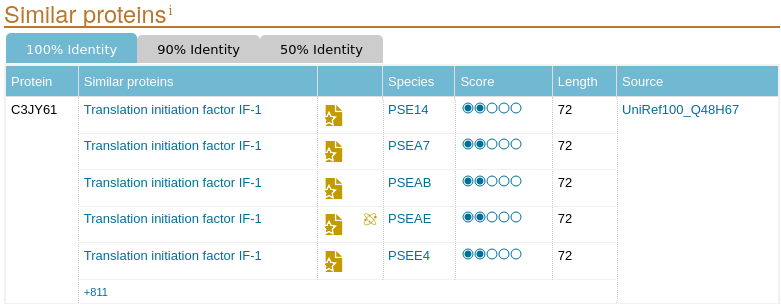

In [329]:
db["gene:PFLU_3804"].attributes.get("description")

['putative translation initiation factor IF-1']

In Pflu.SBW25, this gene product is attributed as "putative translation initiation factor IF-1" while in 100% identical homologues, it is attributed as "translation initiation factor IF-1".

## C3K8K1 == PFLU_2427
https://www.uniprot.org/uniprot/C3K8K1#similar_proteins

In [330]:
tr_top[tr_top.qacc.str.contains("C3K8K1")]

qacc             sallseqid  sstart  send  qlen  \
130922  tr|C3K8K1|C3K8K1_PSEFS  sp|P86348|ALPH_DEIAC       1    20   394   

        qstart  qend  pident  \
130922      25    44   100.0   

                                               salltitles        pident_level  
130922  sp|P86348|ALPH_DEIAC Alkaline phosphatase (Fra...  excellent (97-100)

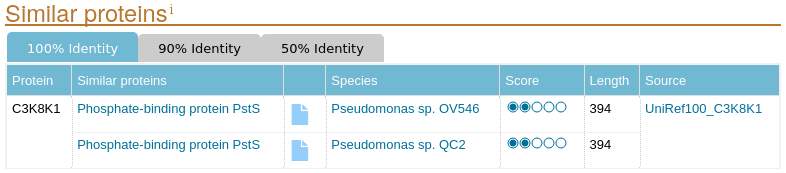

In [331]:
top[top.qacc.str.contains("C3K8K1")]

qacc             sallseqid  sstart  send  qlen  \
130922  tr|C3K8K1|C3K8K1_PSEFS  sp|P86348|ALPH_DEIAC       1    20   394   

        qstart  qend  pident  \
130922      25    44   100.0   

                                               salltitles        pident_level  
130922  sp|P86348|ALPH_DEIAC Alkaline phosphatase (Fra...  excellent (97-100)

In [333]:
blastp_data.loc[blastp_data.qacc.str.contains("C3K8K1")]

qacc                  sallseqid  sstart  send  qlen  \
130900  tr|C3K8K1|C3K8K1_PSEFS       sp|Q02HI0|PPBL_PSEAB       1   392   394   
130901  tr|C3K8K1|C3K8K1_PSEFS        sp|P85173|PHBP_UNKP       1   375   394   
130902  tr|C3K8K1|C3K8K1_PSEFS       sp|K4LAH1|PPBL_PSEAI       1   392   394   
130903  tr|C3K8K1|C3K8K1_PSEFS       sp|P35482|PPBL_PSEAE       1   368   394   
130904  tr|C3K8K1|C3K8K1_PSEFS       sp|B3EWG9|PARP_SACSO       1   102   394   
130905  tr|C3K8K1|C3K8K1_PSEFS       sp|B3EWG9|PARP_SACSO     102   218   394   
130906  tr|C3K8K1|C3K8K1_PSEFS      sp|Q9KK89|PSTS3_MYCAV      95   365   394   
130907  tr|C3K8K1|C3K8K1_PSEFS      sp|Q9CBE5|PSTS3_MYCLE      80   369   394   
130908  tr|C3K8K1|C3K8K1_PSEFS      sp|P9WGT9|PSTS2_MYCTU      83   370   394   
130909  tr|C3K8K1|C3K8K1_PSEFS      sp|P9WGT8|PSTS2_MYCTO      83   370   394   
130910  tr|C3K8K1|C3K8K1_PSEFS  sp|A0A0H3MBL5|PSTS2_MYCBP      83   370   394   
130911  tr|C3K8K1|C3K8K1_PSEFS      sp|P9WGT7|PSTS3_MYCTU      81   370   394   
130912  tr|C3K8K1|C3K8K1_PSEFS      sp|P9WGT6|PSTS3_MYCTO      81   370   394   
130913  tr|C3K8K1|C3K8K1_PSEFS  sp|A0A0H3MBK5|PSTS3_MYCBP      81   370   394   
130914  tr|C3K8K1|C3K8K1_PSEFS      sp|P0A5Y3|PSTS3_MYCBO      81   370   394   
130915  tr|C3K8K1|C3K8K1_PSEFS       sp|P0AG83|PSTS_SHIFL      25   345   394   
130916  tr|C3K8K1|C3K8K1_PSEFS       sp|P0AG82|PSTS_ECOLI      25   345   394   
130917  tr|C3K8K1|C3K8K1_PSEFS       sp|Q58421|PSTS_METJA     111   353   394   
130918  tr|C3K8K1|C3K8K1_PSEFS  sp|A0A0H3M950|PSTS1_MYCBP     100   360   394   
130919  tr|C3K8K1|C3K8K1_PSEFS      sp|P9WGU1|PSTS1_MYCTU     100   360   394   
130920  tr|C3K8K1|C3K8K1_PSEFS      sp|P9WGU0|PSTS1_MYCTO     100   360   394   
130921  tr|C3K8K1|C3K8K1_PSEFS      sp|P86011|CUTI2_COLGL       1    21   394   
130922  tr|C3K8K1|C3K8K1_PSEFS       sp|P86348|ALPH_DEIAC       1    20   394   
130923  tr|C3K8K1|C3K8K1_PSEFS       sp|Q9CNJ4|PSTS_PASMU       1   337   394   
130924  tr|C3K8K1|C3K8K1_PSEFS       sp|P45192|PSTS_HAEIN       9   172   394   
130925  tr|C3K8K1|C3K8K1_PSEFS      sp|P85437|CR3RP_CANAX       1    21   394   
130926  tr|C3K8K1|C3K8K1_PSEFS       sp|P46338|PSTS_BACSU     135   245   394   
130927  tr|C3K8K1|C3K8K1_PSEFS       sp|Q98FL2|PSTS_RHILO      95   256   394   
130928  tr|C3K8K1|C3K8K1_PSEFS      sp|P80775|CWP16_PHAVU       1    20   394   
130929  tr|C3K8K1|C3K8K1_PSEFS       sp|A6YPJ8|RS3A_TRIIF      45   193   394   
130930  tr|C3K8K1|C3K8K1_PSEFS       sp|P29913|NQO1_PARDE     228   336   394   
130931  tr|C3K8K1|C3K8K1_PSEFS       sp|Q7A0X7|PSTS_STAAW     109   193   394   
130932  tr|C3K8K1|C3K8K1_PSEFS       sp|Q6G9H1|PSTS_STAAS     109   193   394   
130933  tr|C3K8K1|C3K8K1_PSEFS       sp|Q7A5Q2|PSTS_STAAN     109   193   394   
130934  tr|C3K8K1|C3K8K1_PSEFS       sp|Q7A2S1|PSTS_STAAM     109   193   394   
130935  tr|C3K8K1|C3K8K1_PSEFS       sp|Q5HG31|PSTS_STAAC     109   193   394   
130936  tr|C3K8K1|C3K8K1_PSEFS       sp|Q2FYP6|PSTS_STAA8     109   193   394   
130937  tr|C3K8K1|C3K8K1_PSEFS       sp|Q2FH48|PSTS_STAA3     109   193   394   
130938  tr|C3K8K1|C3K8K1_PSEFS       sp|Q6GH18|PSTS_STAAR     109   193   394   
130939  tr|C3K8K1|C3K8K1_PSEFS       sp|Q2YXX9|PSTS_STAAB     109   193   394   
130940  tr|C3K8K1|C3K8K1_PSEFS        sp|P28037|AL1L1_RAT     310   368   394   
130941  tr|C3K8K1|C3K8K1_PSEFS       sp|A4SNB0|DADA_AERS4     126   295   394   
130942  tr|C3K8K1|C3K8K1_PSEFS       sp|Q49XJ1|PSTS_STAS1     117   192   394   
130943  tr|C3K8K1|C3K8K1_PSEFS       sp|Q5HPF2|PSTS_STAEQ     119   194   394   
130944  tr|C3K8K1|C3K8K1_PSEFS       sp|Q8CP98|PSTS_STAES     119   194   394   

        qstart  qend   pident  \
130900       1   394   72.319   
130901      25   393   76.596   
130902       1   394   71.571   
130903       1   393   44.750   
130904      25   165   63.121   
130905     227   368   56.849   
130906      78   372   28.990   
130907      51   380   27.811   
13

In [334]:
tr_top[tr_top.qacc.str.contains("C3K8K1")]

qacc             sallseqid  sstart  send  qlen  \
130922  tr|C3K8K1|C3K8K1_PSEFS  sp|P86348|ALPH_DEIAC       1    20   394   

        qstart  qend  pident  \
130922      25    44   100.0   

                                               salltitles        pident_level  
130922  sp|P86348|ALPH_DEIAC Alkaline phosphatase (Fra...  excellent (97-100)

In [335]:
db["gene:PFLU_2427"].attributes.get("description")

['putative alkaline phosphatase']

A subpart of this protein (1-20) is 100% identical to 25-44 of P86348. No matches over the entire length in the SP section. trEMBL matches, see screenshot below above.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [270]:
putatives.head()

Entry    Entry name  \
Transcript ID                         
CAY51327       C3JYN4    ZIPA_PSEFS   
CAY47103       C3K5X7  C3K5X7_PSEFS   
CAY53750       C3K1G2    YIDC_PSEFS   
CAY46998       C3KCR8  C3KCR8_PSEFS   
CAY52573       C3K2K8    YBEY_PSEFS   

                                                   Protein names  \
Transcript ID                                                      
CAY51327                              Cell division protein ZipA   
CAY47103       Cell division protein ZapE (Z ring-associated ...   
CAY53750       Membrane protein insertase YidC (Foldase YidC)...   
CAY46998                            Ribosome-binding ATPase YchF   
CAY52573                      Endoribonuclease YbeY (EC 3.1.-.-)   

                   Gene names  \
Transcript ID                   
CAY51327       zipA PFLU_4589   
CAY47103       zapE PFLU_0835   
CAY53750       yidC PFLU_6134   
CAY46998       ychF PFLU_0729   
CAY52573       ybeY PFLU_5406   

                                                        Sequence  
Transcript ID                                                     
CAY51327       MEIGLREWLIVIGIIVIAGILFDGWRRMRGGKGKLKFRLDRNLSNL...  
CAY47103       MTPLERYQADLKRPEFFHDAAQETAVRHLQRLYDDLVAASQSKPGM...  
CAY53750       MDIKRTILIVALAIVSYVMVLKWNQDYGQAALPTQNVATNQAAPAI...  
CAY46998       MGFNCGIVGLPNVGKSTLFNALTKSGIAAENFPFCTIEPNSGIVAM...  
CAY52573       MLELDLQLATEAPAPSEAQFREWCALALRQRTADSELTIRLVDEPE...

In [209]:
blastp_salltitles_split.merge(putatives, right_on="Entry", left_on=1)

0       1                                                  2   Entry  \
0    sp  C3JY43  TTCA_PSEFS tRNA-cytidine(32) 2-sulfurtransfera...  C3JY43   
1    sp  C3K839  Y879_PSEFS Nucleotide-binding protein PFLU_087...  C3K839   
2    sp  C3KE92  YACG_PSEFS DNA gyrase inhibitor YacG OS=Pseudo...  C3KE92   
3    sp  C3KE01  Y992_PSEFS UPF0246 protein PFLU_0992 OS=Pseudo...  C3KE01   
4    sp  C3JZS5  TRPF_PSEFS N-(5'-phosphoribosyl)anthranilate i...  C3JZS5   
..   ..     ...                                                ...     ...   
101  sp  C3K0D5  MINE_PSEFS Cell division topological specifici...  C3K0D5   
102  sp  C3K4H5  GCH4_PSEFS GTP cyclohydrolase FolE2 OS=Pseudom...  C3K4H5   
103  sp  C3K4R1  PLSB_PSEFS Glycerol-3-phosphate acyltransferas...  C3K4R1   
104  sp  C3JXF9  GLSA_PSEFS Glutaminase OS=Pseudomonas fluoresc...  C3JXF9   
105  sp  C3K3I7  MDCC_PSEFS Malonate decarboxylase acyl carrier...  C3K3I7   

     Entry name                                      Protein names  \
0    TTCA_PSEFS  tRNA-cytidine(32) 2-sulfurtransferase (EC 2.8....   
1    Y879_PSEFS               Nucleotide-binding protein PFLU_0879   
2    YACG_PSEFS                          DNA gyrase inhibitor YacG   
3    Y992_PSEFS                          UPF0246 protein PFLU_0992   
4    TRPF_PSEFS  N-(5'-phosphoribosyl)anthranilate isomerase (P...   
..          ...                                                ...   
101  MINE_PSEFS       Cell division topological specificity factor   
102  GCH4_PSEFS             GTP cyclohydrolase FolE2 (EC 3.5.4.16)   
103  PLSB_PSEFS  Glycerol-3-phosphate acyltransferase (GPAT) (E...   
104  GLSA_PSEFS                           Glutaminase (EC 3.5.1.2)   
105  MDCC_PSEFS  Malonate decarboxylase acyl carrier protein (M...   

          Gene names                                           Sequence  
0     ttcA PFLU_3786  MGTLTVNQNKLQKRLRRLAGEAVADFNMIEDGDKVMVCLSGGKDSY...  
1          PFLU_0879  MRLIIVSGRSGSGKSTALNVLEDNGFYCIDNLPAGLLPELAERALI...  
2     yacG PFLU_0788  MSQPLTVDCPTCGAPVEWTAANLNRPFCSDRCKLIDLGAWAAEEHK...  
3          PFLU_0992  MLMVISPAKTLDFESTPVTPRFTQPQYLDHSQELIEQLRELSPAQI...  
4     trpF PFLU_4188  MSAVRSKICGITRIEDALAAVEAGADAIGLVFYAKSPRSVNVLQAR...  
..               ...                                                ...  
101   minE PFLU_4371  MKFLDFFRANKKPSTASVAKERLQIIVAHERGQRSTPDYLPALQKE...  
102  folE2 PFLU_6088  MNALTLPDIAAQASRQALPLDWVGMCGIALPILIDGQRLTATADAG...  
103   plsB PFLU_1255  MTRSPFRRLVFGTLRRLLYLWVRSETINQSSLTLNLDRSRPVFYVL...  
104   glsA PFLU_3587  MQAMLSSILDEVRPLIGLGKVADYIPALADVPANQLGIAVYGNDGS...  
105   mdcC PFLU_5741  METLSFEFPAGQPPKGRALVGCVGSGDLEVLLEPGTPGTLTIQVQT...  

[106 rows x 8 columns]